### Importing Libraries 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

### Loading dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
122,123,7.7,2.8,6.7,2.0,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.duplicated().sum()

0

#### Univariate Analysis

In [7]:
numeric_cols = data.select_dtypes(include=['int','float']).columns

In [8]:
numeric_cols

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

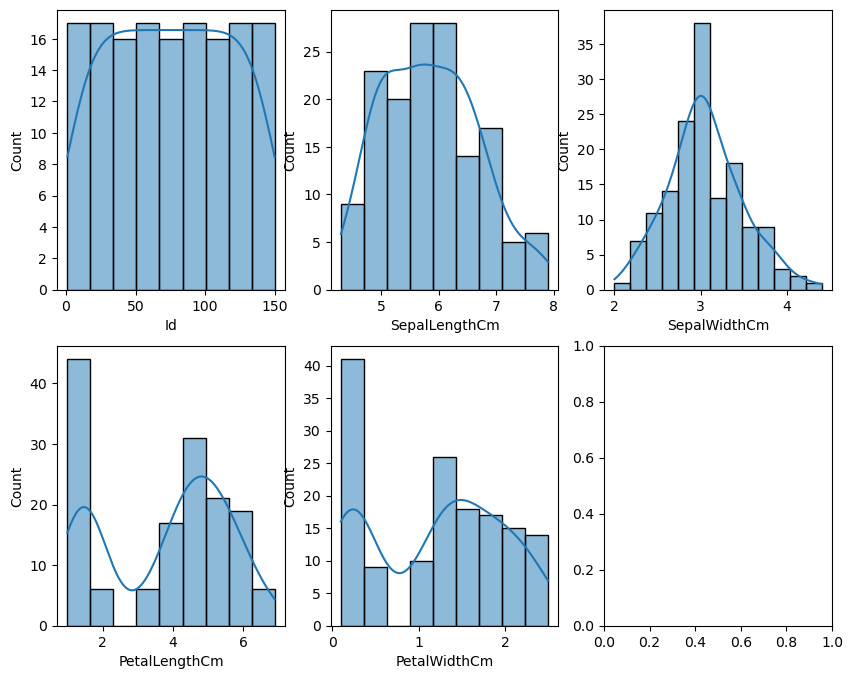

In [9]:
f,ax=plt.subplots(2,3,figsize=(10,8))
cols_index = 0
try :
    for i in range(2):
      for j in range(3):
         sns.histplot(data[numeric_cols[cols_index]],kde=True,ax=ax[i,j])
         #plt.title(numeric_cols[cols_index])
         cols_index +=1
    plt.tight_layout()
    plt.show()
except :
    pass

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='Species', ylabel='count'>

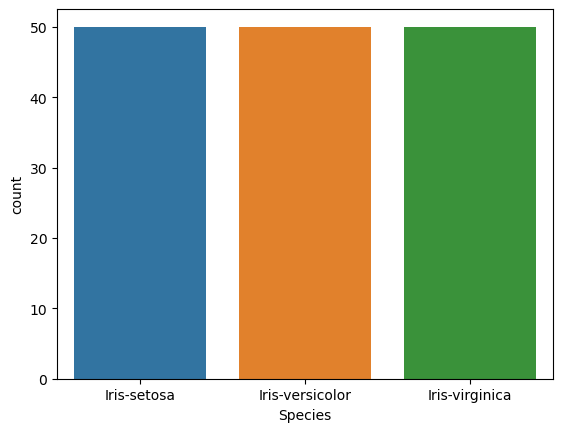

In [10]:
print(data['Species'].value_counts())
sns.countplot(x=data['Species'])

#### Bivariate Analysis

In [11]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

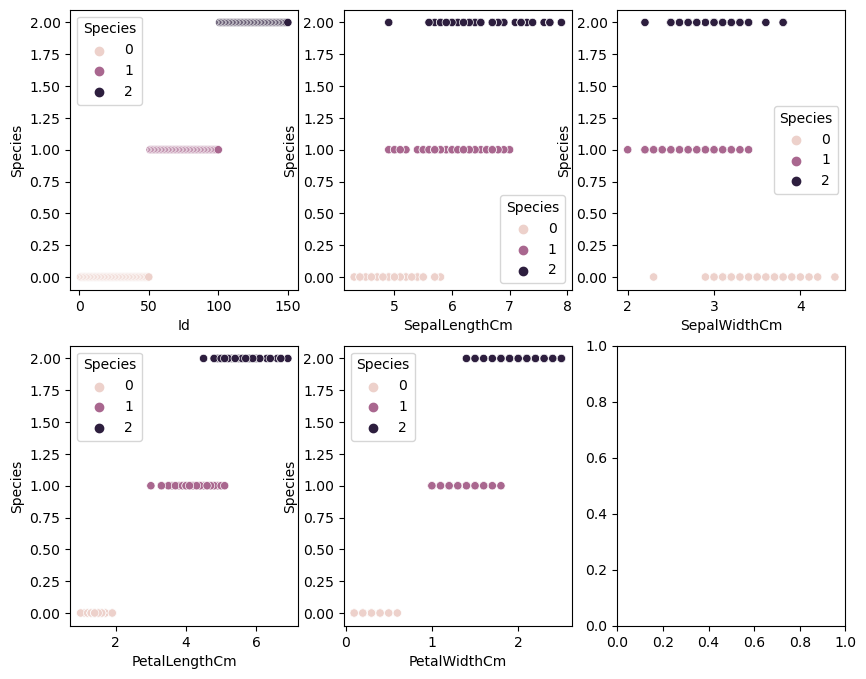

In [13]:
f,ax = plt.subplots(2,3,figsize=(10,8))
cols_index=0
try :
    for i in range(2):
        for j in range(3):
            sns.scatterplot(x=data[numeric_cols[cols_index]],y=data['Species'],ax=ax[i,j],hue=data['Species'])
            cols_index +=1
    plt.tight_layout()
    plt.show()
except:
    pass

By looking at this plots we can say that flowers are easily classified on the basis of petal length as there is clear separation.

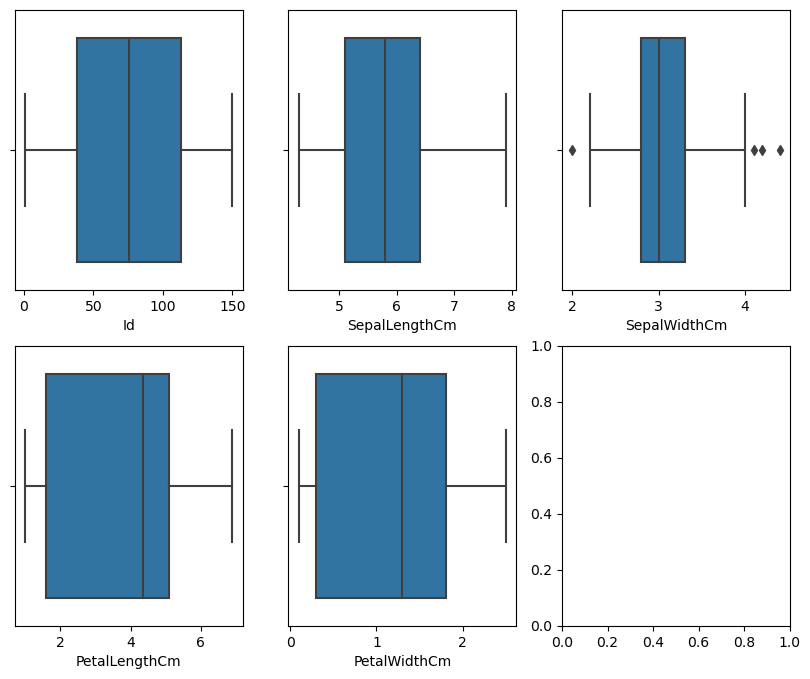

In [14]:
f,ax = plt.subplots(2,3,figsize=(10,8))
cols_index=0
try :
    for i in range(2):
        for j in range(3):
            sns.boxplot(x=data[numeric_cols[cols_index]],ax=ax[i,j],hue=data['Species'])
            cols_index +=1
    plt.tight_layout()
    plt.show()
except:
    pass

No such outliers to remove 


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


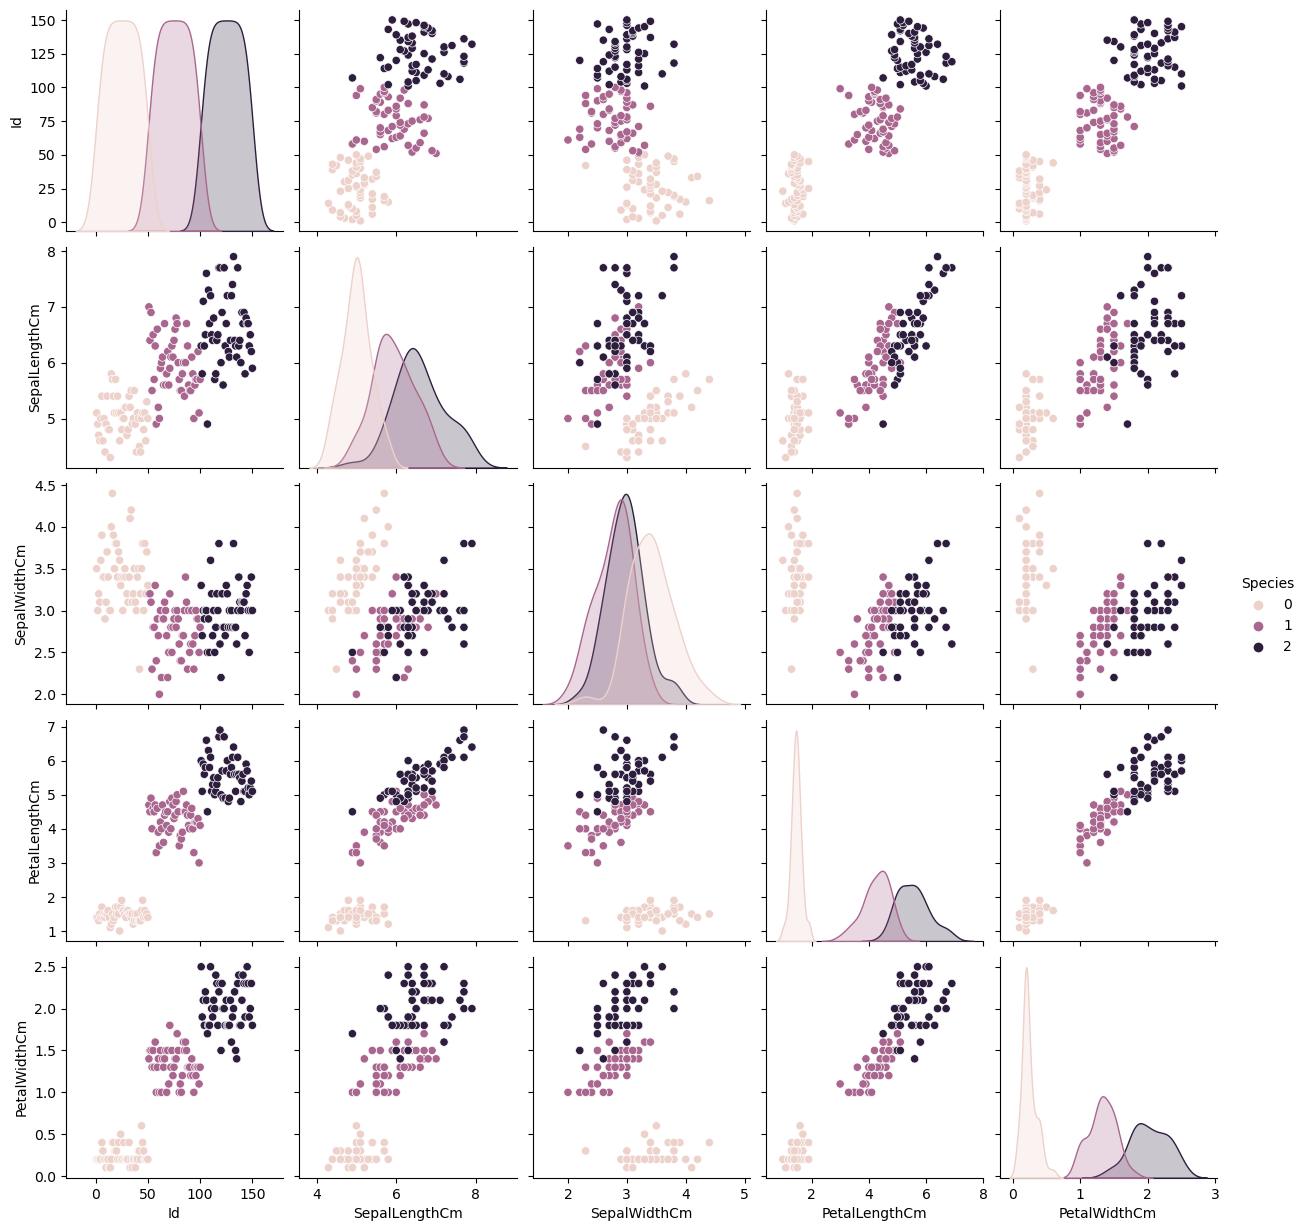

In [15]:
sns.pairplot(data,hue='Species')

### Splitting data

In [16]:
data.drop('Id',axis=1,inplace=True)

In [17]:
x = data.drop('Species',axis=1)
y = data['Species']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

### Model Building

In [27]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

#### Model evaluation

In [28]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9666666666666667
Precision: 0.9703703703703703
Recall: 0.9666666666666667
F1-score: 0.9667698658410733
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


In [36]:
# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


F1-score: 0.9667698658410733


Our model is giving 0.97 f1-score which means our model is prefect